In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress
import pandas as pd
import numpy as np
plt.style.use('ggplot')

# Introduction

There are two main ways to implement linear regression in python. It may be regarded as an optimization problem that tries to find an optimal line model that minimizes a cost function (i.e. squared error). Also, there is a mathematical solution. The first example is focused on explaining the concept of finding the line equation while the second example is more aligned with machine learning practices.

$$ 
y_i = \beta_0 (intercept) + X_i \times \beta_1 (slope) 
$$

Note that the mathematical solution is based on least squared error.

# First Example

In [3]:
data = pd.read_csv('../Data/LinearData.csv')
data.describe()

,Temp,Sales
count,11.000000,11.000000
mean,66.727273,400.727273
std,8.591751,132.052331
min,52.000000,185.000000
25%,61.000000,328.500000
50%,66.000000,408.000000
75%,74.000000,483.500000
max,80.000000,614.000000


In [4]:
X = data.Temp
y = data.Sales
reg_result = linregress(X,y)
print('Slope: {:.3f}\nIntercept: {:.3f}'.format(reg_result.slope,reg_result.intercept))

Slope: 14.864
Intercept: -591.093


In [5]:
y_predicted = X * reg_result.slope + reg_result.intercept

## Coefficient of Determination R squared

R squared is a measure to compare the linear regression results with the expected value (mean of y). It varies from 0 to 1 with 1 being the best regression accuracy.

![alt text](../Figures/R2.png "Obtained from wikipedia")

In [6]:
def r_squared(X,y, y_predicted):
    y_mean = np.mean(y)
    
    sum_m = 0
    sum_p = 0
    for i in range(len(y)):
        sum_m += (y[i]-y_mean)**2
        sum_p += (y[i]-y_predicted[i])**2
        
    return 1 - sum_p/sum_m

In [7]:
print(r'R^2 value: {:.4f}'.format(r_squared(X,y, y_predicted)))

R^2 value: 0.9353


## Mathematical Solution

The mathematical solution relies on statistical measures including covariance, variance and mean values. 

Slope = $\frac{C(X,y)}{Var(X)}$ 

Bias/intercept = $ \bar{y} - slope . \bar{X}$

In [8]:
slope_math = np.cov(X,y)[0][1]/np.cov(X,y)[0][0] # Covariance(X,y)/Variance(X)
intercept_math = np.mean(y)-slope_math*np.mean(X) # mean(y) - slope * mean(X)

In [9]:
print('Slope: {:.3f}\nIntercept: {:.3f}'.format(slope_math,intercept_math))

Slope: 14.864
Intercept: -591.093


Text(0,0.5,'Label')

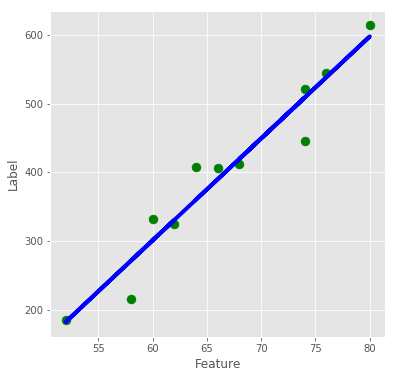

In [10]:
fig=plt.figure(figsize=(6,6), facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)

y_predicted = X * slope_math + intercept_math

ax.scatter(X, y,color='green',s=80)
ax.plot(X, y_predicted, color='blue', linewidth=4)
ax.set_xlabel('Feature'); ax.set_ylabel('Label')

# Second Example

The second example is focused on using a linear regression package as a machine learning technique/algorithm.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [12]:
clf=LinearRegression()
clf.fit(diabetes_X_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# The coefficients
print('Coefficients: \n', clf.coef_)

Coefficients: 
 [938.23786125]


In [14]:
print("Mean squared error: %.2f"
      % np.mean((clf.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Mean squared error: 2548.07


In [15]:
print('Variance score: %.2f' % clf.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


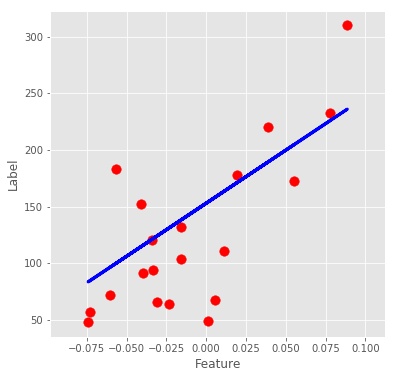

In [18]:
fig=plt.figure(figsize=(6,6), facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)

ax.scatter(diabetes_X_test, diabetes_y_test,  color='red',s=90)
ax.plot(diabetes_X_test, clf.predict(diabetes_X_test), color='blue',
         linewidth=3)
ax.set_xlabel('Feature')
_ = ax.set_ylabel('Label')